In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
from utils_analysis import plot_trajectory, getTuningMap, getLinearSpeed

In [2]:
datafolder = "/media/zilong/4TB Storage HDD/2PImaging/183_03082023"
filenamelist = ["00004", "00005", "00006", "00007", "00008", "00009", "00010", "00012", "00014", "00016", "00017", "00018"]

# datafolder = "/media/zilong/4TB Storage HDD/2PImaging/183_04082023"
# filenamelist = ["00019", "00020", "00022", "00027", "00028", "00029", "00030", "00031", "00032", "00033", "00034", "00035", "00038"]

#if trajectory is already saved in pickle file, load it
if os.path.exists(os.path.join(datafolder,'UnrotTiff', '2D2P','trajectory.pickle')):
    with open(os.path.join(datafolder,'UnrotTiff', '2D2P','trajectory.pickle'), 'rb') as f:
        trajectory = pickle.load(f)
    allX = trajectory[0]
    allZ = trajectory[1]
    allTime = trajectory[2]
else:
    allX, allZ, allTime, fig = plot_trajectory(datafolder, filenamelist)


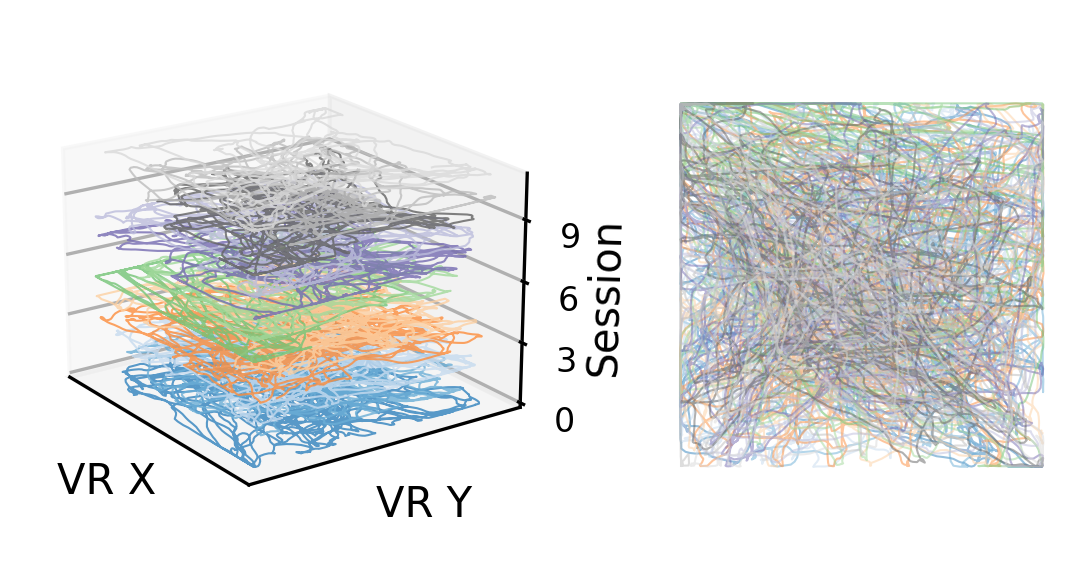

In [4]:
#plot the trajectory


fig = plt.figure(figsize=(4, 2), dpi=300)

gs = fig.add_gridspec(1, 2, width_ratios=[1, 0.6], height_ratios=[1])

allX_merged = np.concatenate(list(allX.values()))
allZ_merged = np.concatenate(list(allZ.values()))
xmax = np.max(allX_merged); xmin = np.min(allX_merged)
zmax = np.max(allZ_merged); zmin = np.min(allZ_merged)

#for each session, normalize the trajectory according to min and max
for i in range(len(allX)):
    allX[i] = (allX[i] - xmin) / (xmax - xmin)
    allZ[i] = (allZ[i] - zmin) / (zmax - zmin)

labelsize=10
ticksize=8

#choose colormap when plot, equally sampled from tab20c accodring to the number of sessions
colors = plt.cm.tab20c(np.linspace(0, 1, len(allX)))

#plot the trajectory of each session in subplot 1, but with different colors
ax1 = fig.add_subplot(gs[0], projection='3d')

for i in range(len(allX)):
    ax1.plot(allX[i], allZ[i], i, alpha = 0.8, linewidth = 0.5, color = colors[i])
    

#make x y label closer to the plot
ax1.xaxis.labelpad = -10
ax1.yaxis.labelpad = -10
#set zticks to integers, every 5 integers
ax1.set_zticks(range(len(allX))[::3])
#set fonstsize of x y z ticks
ax1.tick_params(axis='both', which='major', labelsize=ticksize)
#set grid on
ax1.grid(True, color='gray', linestyle=':', linewidth=0.5, alpha=0.5)   

ax1.view_init(azim=145, elev=20)  

#xlabel and ylabel and zlabel putting x ay label parallel to the ticks not to the panel
ax1.set_xlabel('VR X', fontsize=labelsize, rotation_mode='anchor', ha='right')
ax1.set_ylabel('VR Y', fontsize=labelsize, rotation_mode='anchor', ha='right')
#set z labels and rotation 180 degree
ax1.set_zlabel('Session', fontsize=labelsize, rotation=90)
#make z label closer to the plot
ax1.zaxis.labelpad = -10
#make z ticks closer to the plot
ax1.tick_params(axis='z', pad=-2)

#set x and y z ticks off
ax1.set_xticks([])
ax1.set_yticks([])

#plot the merged trajectory (allX, allZ) in subplot 2, but with different colors
ax2 = fig.add_subplot(gs[1])
for i in range(len(allX)):
    ax2.plot(allX[i], allZ[i], alpha = 0.5, linewidth = 0.5, color = colors[i])
#square the plot
ax2.set_aspect('equal', 'box')

#set ticks off
ax2.set_xticks([])
ax2.set_yticks([])

#box off
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

#cinrease the space between subplots
plt.subplots_adjust(wspace=0.5)

#tight layout
fig.tight_layout()

#save figure
fig.savefig(os.path.join(datafolder,'UnrotTiff', '2D2P','trajectory.pdf'), dpi=300)

### make the animation of the trajectory

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import matplotlib as mpl
mpl.rcParams['animation.embed_limit'] = 256

# Assuming you have 'allX' and 'allZ' defined as dictionaries

# Create a figure and subplots
fig = plt.figure(figsize=(8, 3), dpi=300)

#choose colormap when plot, equally sampled from tab20c accodring to the number of sessions
colors = plt.cm.tab20c(np.linspace(0, 1, len(allX)))

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

# Plot the merged trajectory in subplot 2
for i in range(len(allX)):
    label_i = str(i) + ' (' + str(len(allX[i])) + ')'
    ax2.plot(allX[i], allZ[i], label=label_i, alpha=0.5, linewidth=1, color=colors[i])

ax2.set_aspect('equal', 'box')
ax2.set_xlabel('VR X')
ax2.set_ylabel('VR Y')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Define the number of frames for your animation (e.g., number of sessions)
num_frames = len(allX)

# Function to update the plot for each frame
def update(frame):
    ax1.clear()
    ax1.set_aspect('equal', 'box')
    ax1.set_xlabel('VR X')
    ax1.set_ylabel('VR Y')
    ax1.set_zlabel('Session ID')
    ax1.set_zticks(range(num_frames)[::2])
    ax1.view_init(elev=20, azim=frame)  # Change the azimuth angle for rotation
    for i in range(num_frames):
        ax1.plot(allX[i], allZ[i], i, alpha=0.5, linewidth=1, color=colors[i])

# Create the animation
ani = FuncAnimation(fig, update, frames=np.linspace(0, 360, 360), interval=50)

# Display the animation in the notebook
from IPython.display import HTML
HTML(ani.to_jshtml())

#save the animation as a gif file to Figures folder
ani.save(os.path.join(datafolder,'UnrotTiff', '2D2P','trajectory.gif'), writer='imagemagick')

#close the figure
plt.close(fig)



Animation size has reached 268771859 bytes, exceeding the limit of 268435456.0. If you're sure you want a larger animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB). This and further frames will be dropped.
MovieWriter imagemagick unavailable; using Pillow instead.
